<a href="https://colab.research.google.com/github/Cp557/concrete_crack_detection/blob/main/model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparison of VGG16 and ResNet50 Models for Concrete Crack Detection
This script loads pre-trained VGG16 and ResNet50 models, evaluates their performance
on a test dataset, and visualizes their predictions on sample images.

In [22]:
import urllib.request
import zipfile
import os
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# URL of the zip file
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip"

urllib.request.urlretrieve(url, "concrete_data_week4.zip")

with zipfile.ZipFile("concrete_data_week4.zip", 'r') as zip_ref:
    zip_ref.extractall("concrete_data_week4")

os.remove("concrete_data_week4.zip")

print("Download and extraction complete.")

Download and extraction complete.


In [24]:
# Define and load ResNet50 model
resnet50_model = Sequential([
    ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(2, activation='softmax', name='predictions')
])

resnet50_model.build((None, 224, 224, 3))

In [14]:
resnet50_model.load_weights('/content/drive/MyDrive/Coding/concrete_crack_detection/classifier_resnet_model.weights.h5')

resnet50_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Define and load VGG16 model
vgg16_model = Sequential([
    VGG16(include_top=False, pooling='avg', weights='imagenet', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(2, activation='softmax', name='predictions')
])

vgg16_model.build((None, 224, 224, 3))

In [16]:
vgg16_model.load_weights('/content/drive/MyDrive/Coding/concrete_crack_detection/classifier_vgg16_model.weights.h5')

vgg16_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
print("ResNet50 Model Summary:")
resnet50_model.summary()
print("\nVGG16 Model Summary:")
vgg16_model.summary()

ResNet50 Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 23,538,690 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)


VGG16 Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 14,715,714 (56.14 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
test_dir = '/content/concrete_data_week4/concrete_data_week4/test'

In [19]:
# Prepare test data
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)
print(test_generator.image_shape)
print(test_generator.num_classes)

Found 500 images belonging to 2 classes.
(224, 224, 3)
2


In [20]:
# Evaluate models on test data
eval_resnet = resnet50_model.evaluate(test_generator)
print(f"ResNet50 Model - Loss: {eval_resnet[0]}, Accuracy: {eval_resnet[1]}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 105s 6s/step - accuracy: 1.0000 - loss: 0.0024
ResNet50 Model - Loss: 0.002554784994572401, Accuracy: 1.0


In [21]:
eval_vgg16 = vgg16_model.evaluate(test_generator)
print(f"VGG16 Model - Loss: {eval_vgg16[0]}, Accuracy: {eval_vgg16[1]}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 334s 21s/step - accuracy: 0.9986 - loss: 0.0070
VGG16 Model - Loss: 0.0075112804770469666, Accuracy: 0.9959999918937683


In [ ]:
# Predicting class of given image
def predict_image(model, img_array):
    prediction = model.predict(img_array)
    return "Positive" if prediction[0][0] > 0.5 else "Negative"

# Creating plot of image with predictions
def plot_images_with_predictions(folder_path, model1, model2, num_images=5):
    plt.figure(figsize=(20, 4*num_images))
    images = os.listdir(folder_path)[:num_images]

    for i, image_name in enumerate(images):
        img_path = os.path.join(folder_path, image_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        vgg_pred = predict_image(model1, img_array)
        resnet_pred = predict_image(model2, img_array)

        plt.subplot(num_images, 1, i+1)
        plt.imshow(img)
        plt.title(f"VGG16: {vgg_pred}, ResNet50: {resnet_pred}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Positive Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


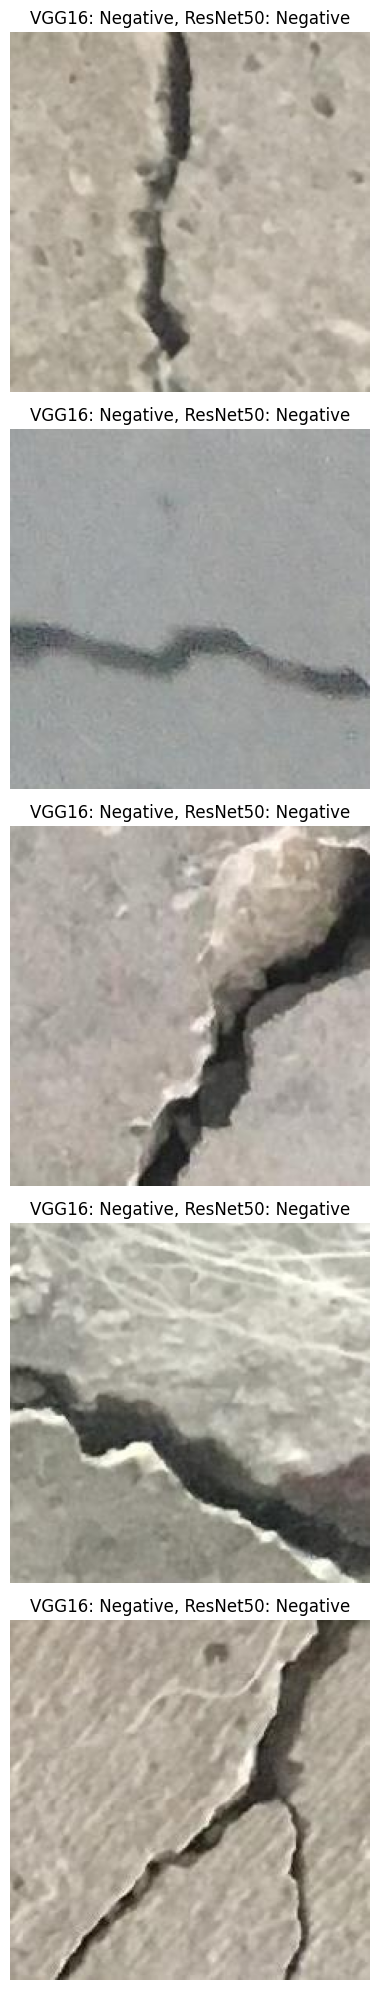


Negative Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


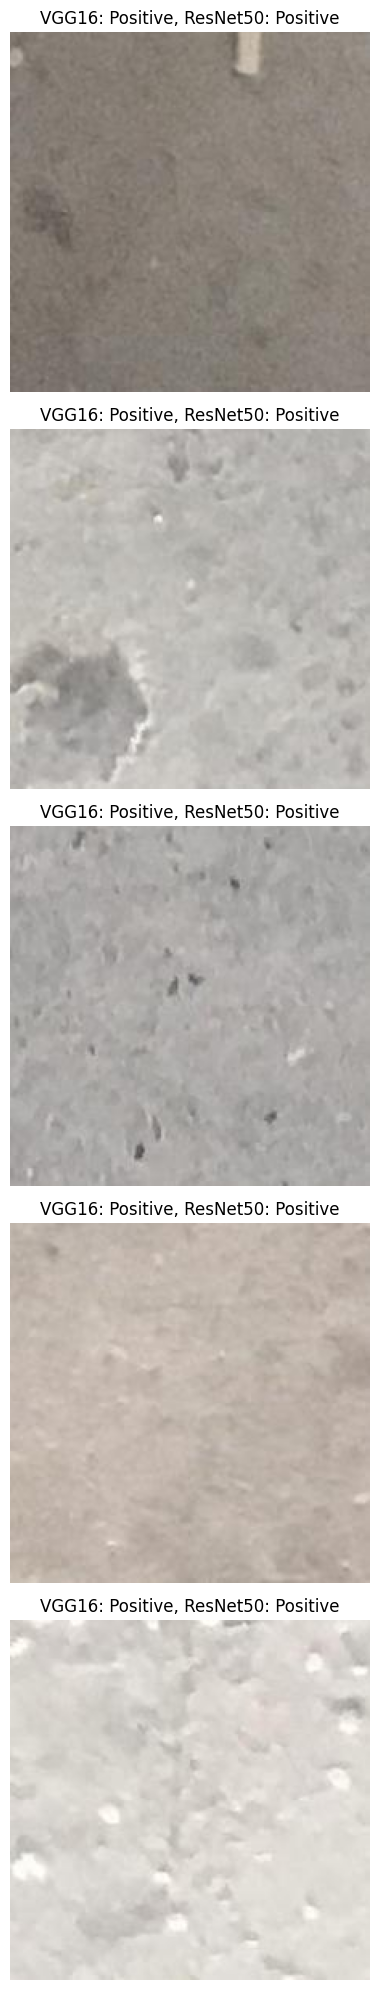

In [23]:
positive_folder = os.path.join(test_dir, 'positive')
negative_folder = os.path.join(test_dir, 'negative')

print("Positive Images:")
plot_images_with_predictions(positive_folder, vgg16_model, resnet50_model)

print("\nNegative Images:")
plot_images_with_predictions(negative_folder, vgg16_model, resnet50_model)